In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('heart_disease.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [58]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [60]:
zero_counts = df.eq(0).sum()

In [6]:
# 1)	age
# 2)	sex
# 3)	chest pain type (4 values)
# 4)	resting blood pressure
# 5)	serum cholestoral in mg/dl
# 6)	fasting blood sugar > 120 mg/dl
# 7)	resting electrocardiographic results (values 0,1,2)
# 8)	maximum heart rate achieved
# 9)	exercise induced angina
# 10)	oldpeak = ST depression induced by exercise relative to rest
# 11)	the slope of the peak exercise ST segment
# 12)	number of major vessels (0-3) colored by flourosopy
# 13)	thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
# 14)	 target : 1 or 0 


In [61]:
zero_counts

age           0
sex          96
cp          143
trestbps      0
chol          0
fbs         257
restecg     147
thalach       0
exang       203
oldpeak      98
slope        21
ca          175
thal          2
target      138
Age_bins      0
dtype: int64

In [62]:
cat_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
num_cols = ['age','chol','trestbps','thalach','oldpeak']

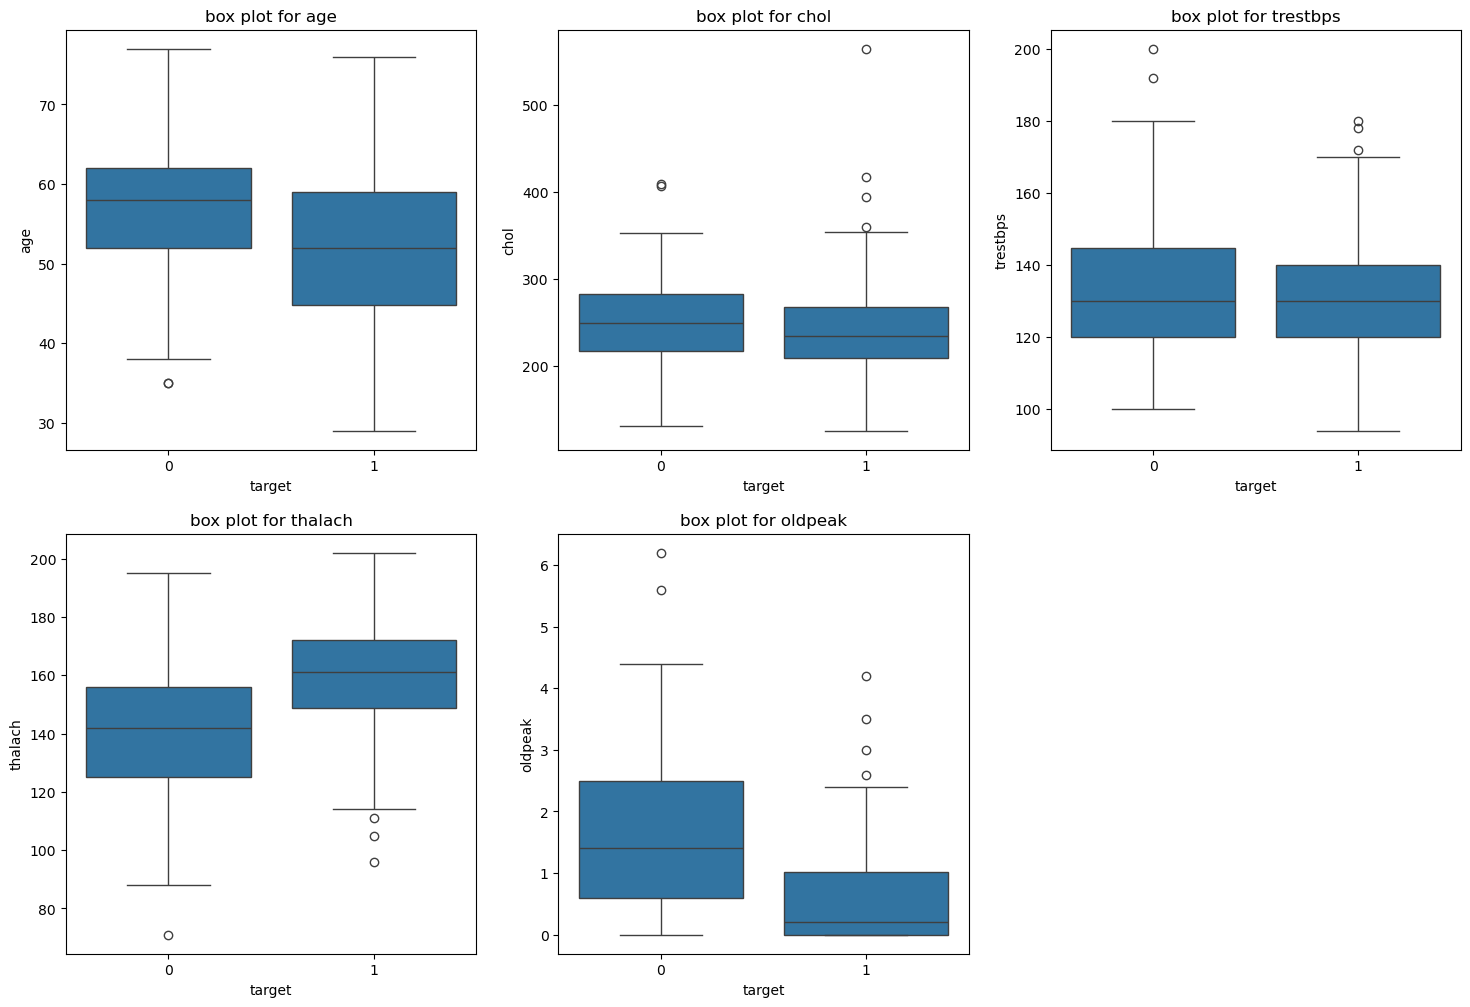

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,12))
for i in range(0,len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.boxplot(y=df[num_cols[i]],x=df['target'])
    plt.title(f'box plot for {num_cols[i]}')
    
plt.show()

In [64]:
# binning

df['Age_bins'] = pd.cut(df['age'],bins=list(range(25,85,5)))
df['Age_bins'].value_counts()

Age_bins
(55, 60]    72
(50, 55]    57
(60, 65]    46
(40, 45]    45
(45, 50]    31
(65, 70]    27
(35, 40]    11
(30, 35]     6
(70, 75]     4
(75, 80]     2
(25, 30]     1
Name: count, dtype: int64

In [65]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_bins
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,"(50, 55]"
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,"(50, 55]"
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,"(65, 70]"
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,"(60, 65]"
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,"(60, 65]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,"(65, 70]"
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,"(40, 45]"
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,"(50, 55]"
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,"(55, 60]"


In [66]:
df.groupby(['target','Age_bins'])['Age_bins'].count()

target  Age_bins
0       (25, 30]     0
        (30, 35]     2
        (35, 40]     4
        (40, 45]    10
        (45, 50]    13
        (50, 55]    20
        (55, 60]    45
        (60, 65]    28
        (65, 70]    15
        (70, 75]     0
        (75, 80]     1
1       (25, 30]     1
        (30, 35]     4
        (35, 40]     7
        (40, 45]    35
        (45, 50]    18
        (50, 55]    37
        (55, 60]    27
        (60, 65]    18
        (65, 70]    12
        (70, 75]     4
        (75, 80]     1
Name: Age_bins, dtype: int64

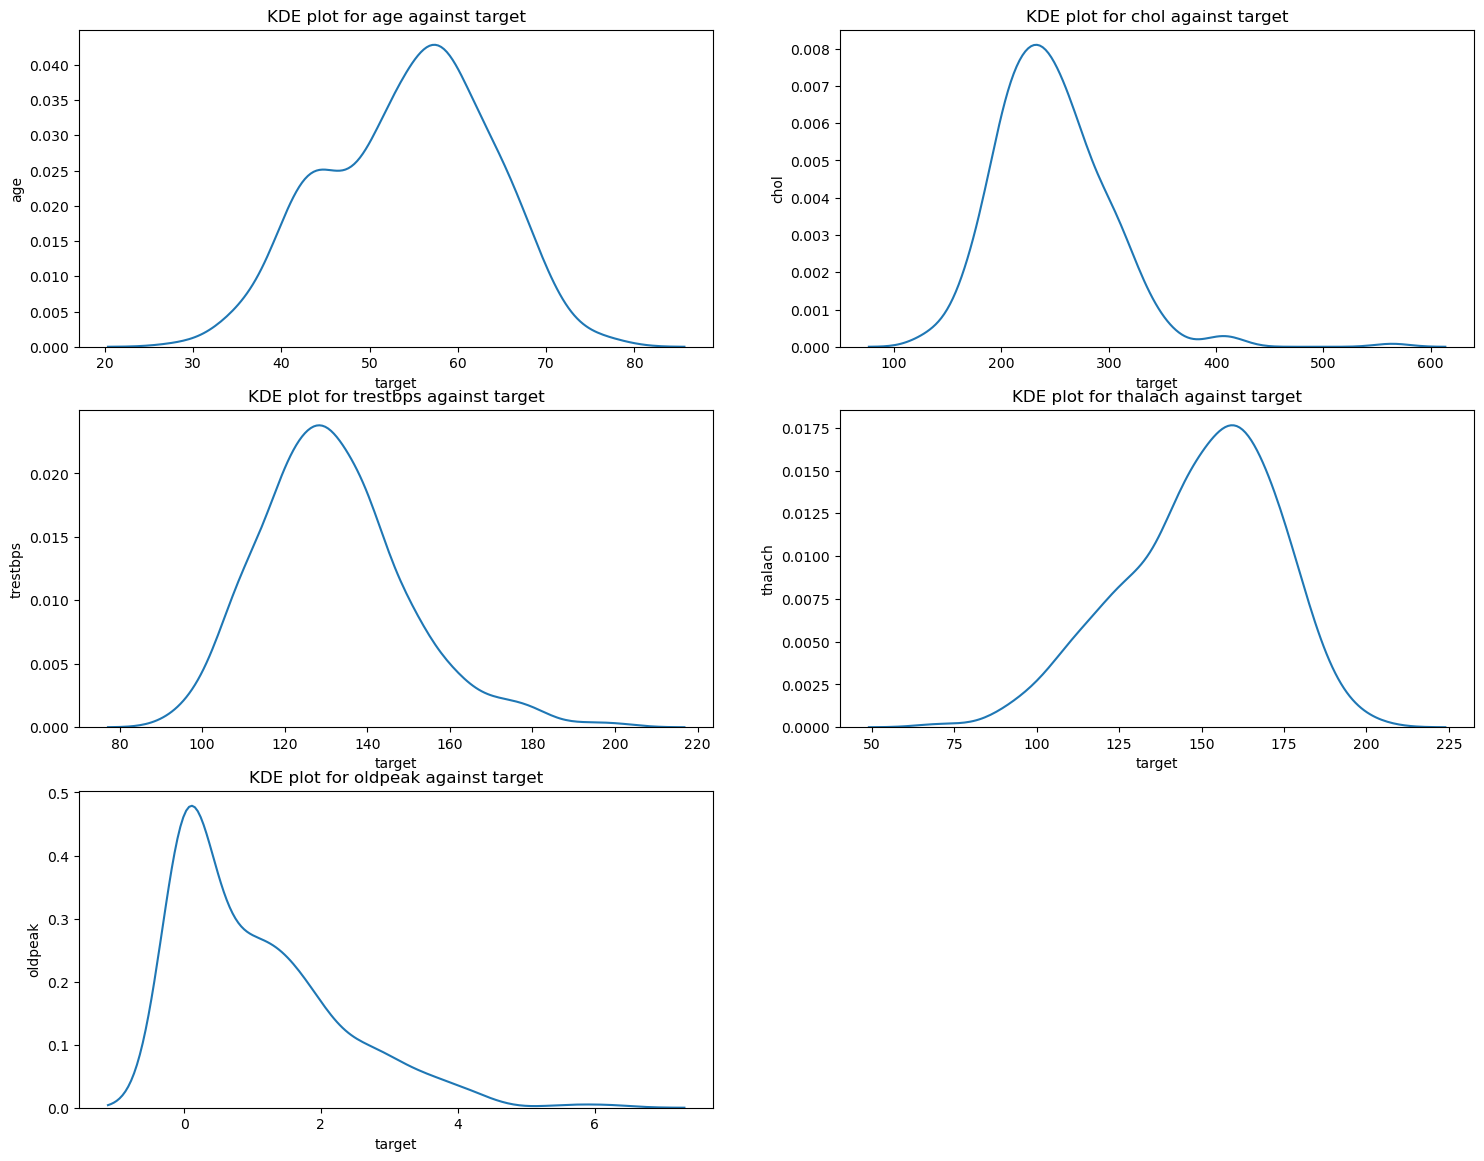

<Figure size 640x480 with 0 Axes>

In [67]:
plt.figure(figsize=(18,14))
for i in range(len(num_cols)):
    plt.subplot(3,2,i+1)
    sns.kdeplot(x=df[num_cols[i]])
    plt.xlabel('target')
    plt.ylabel(num_cols[i])
    plt.title(f'KDE plot for {num_cols[i]} against target')
   
plt.show()
plt.tight_layout()
    

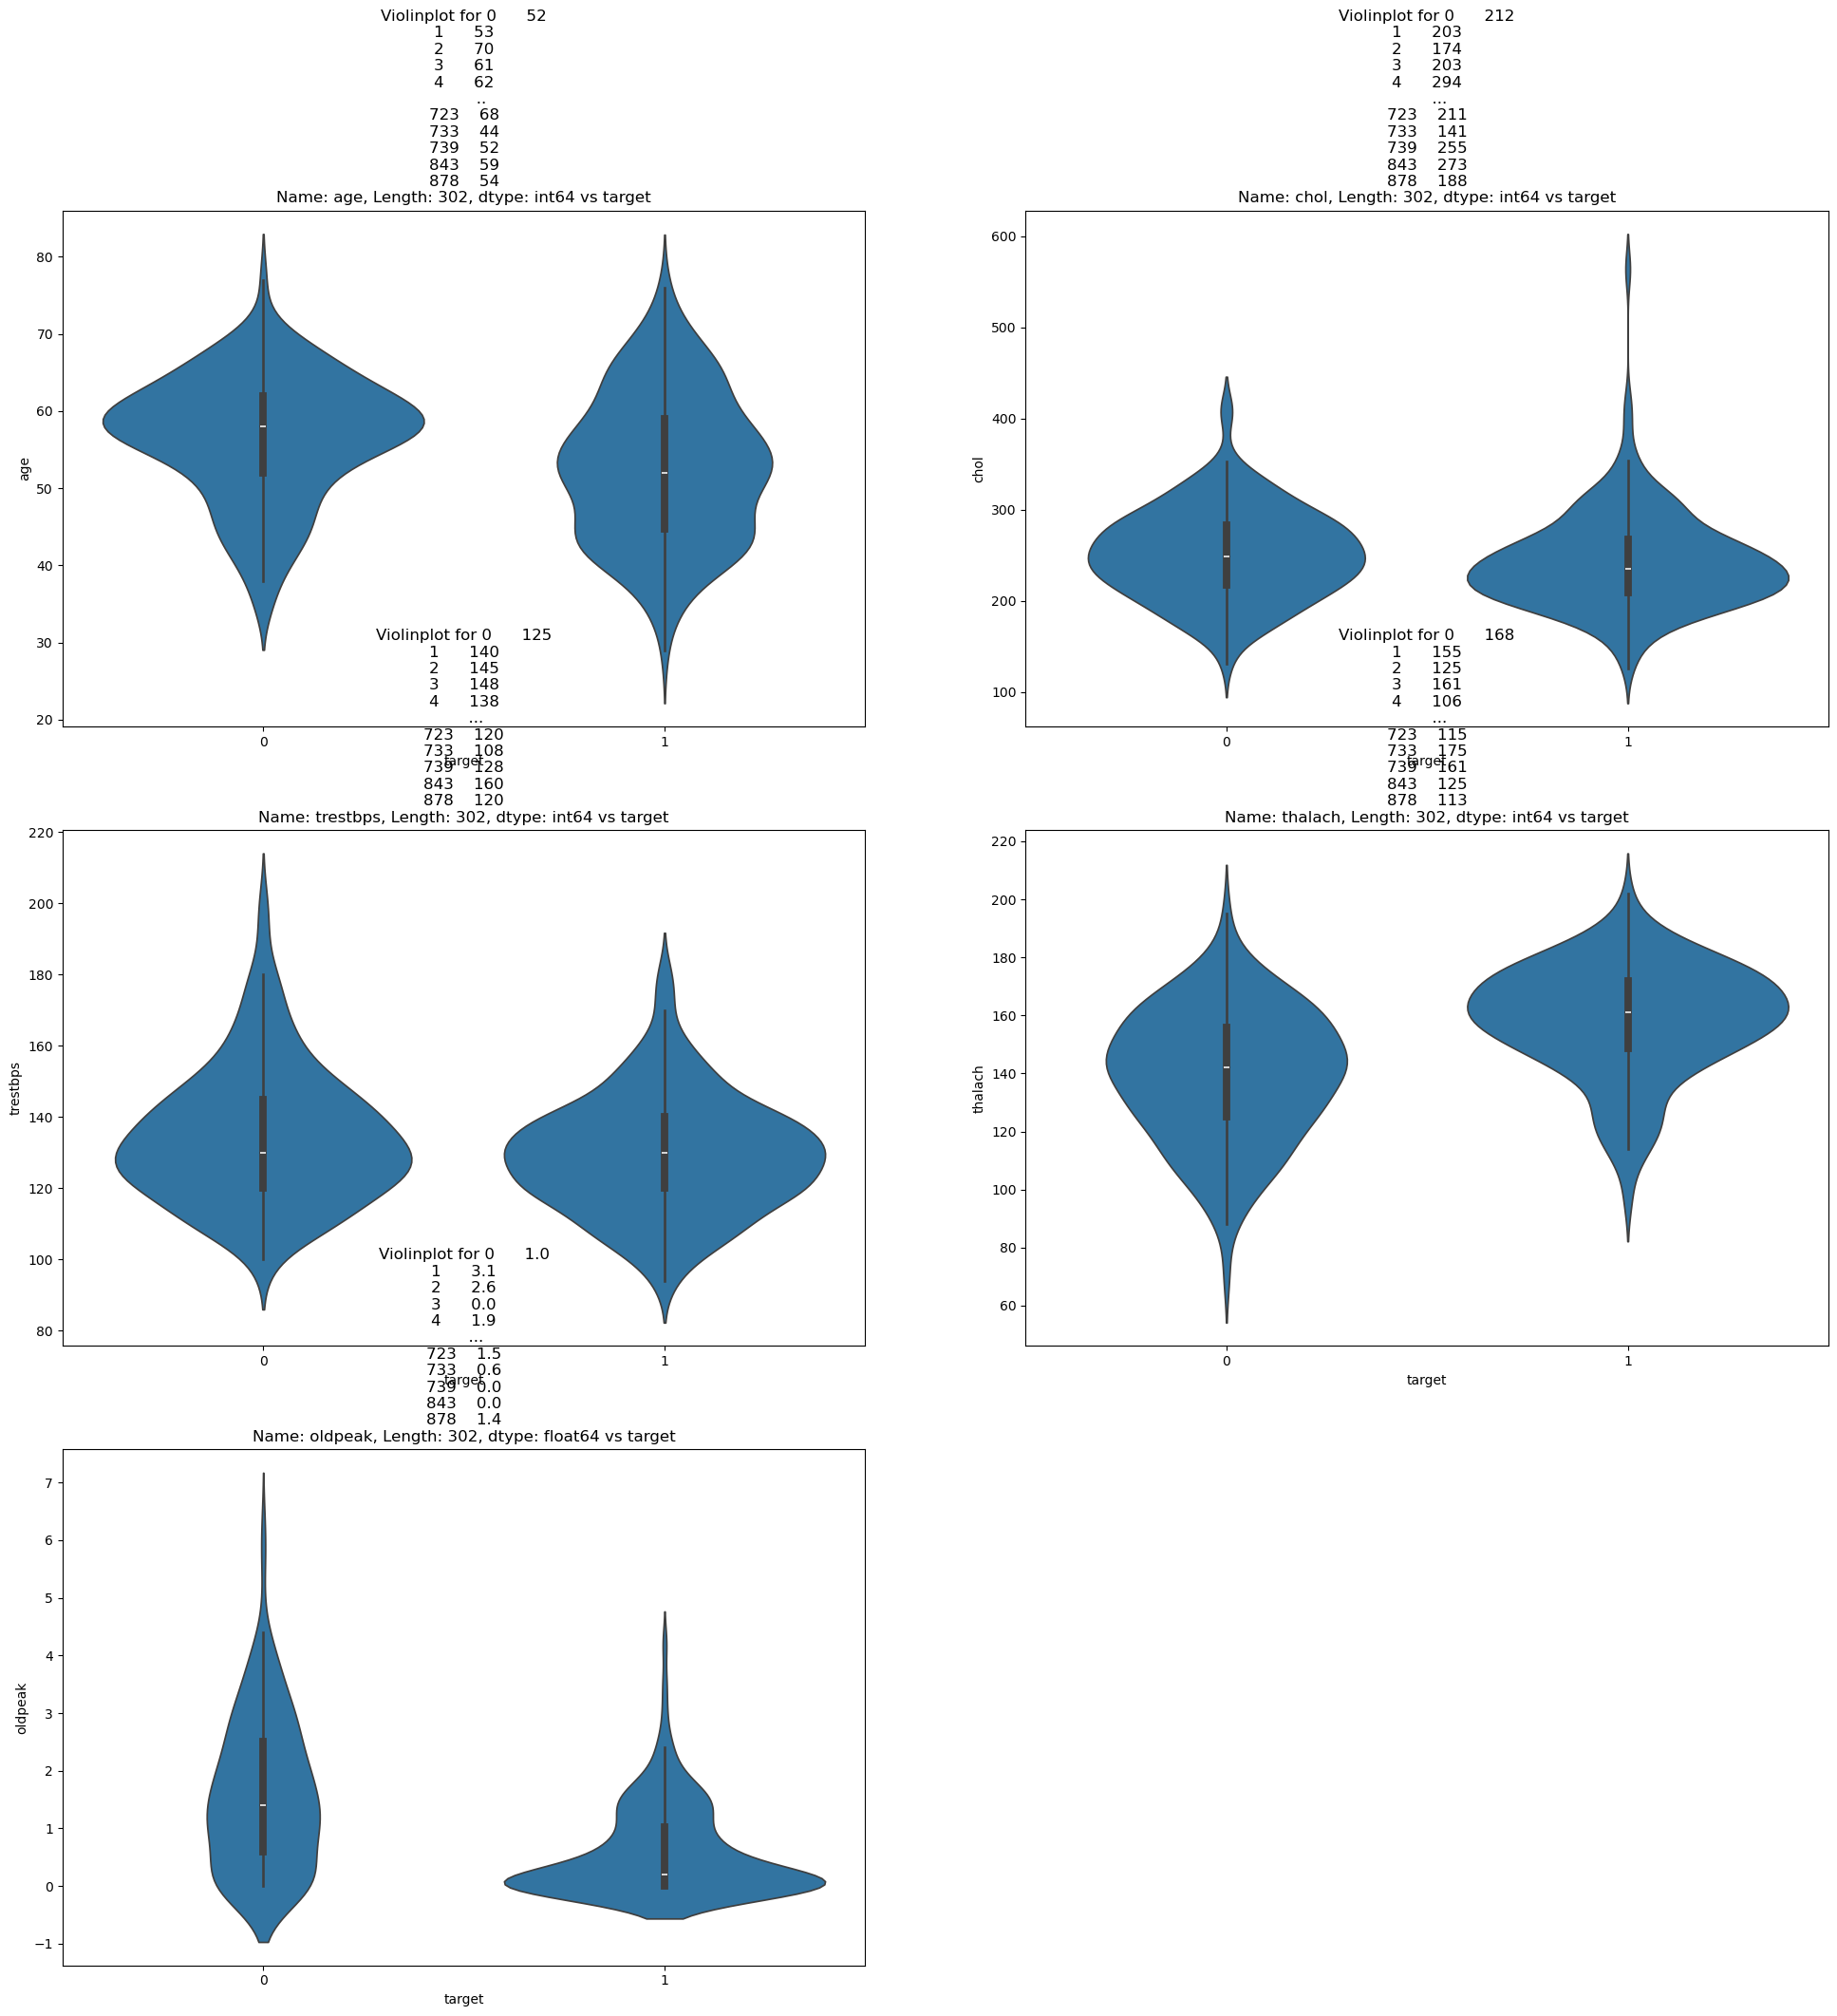

<Figure size 640x480 with 0 Axes>

In [68]:
plt.figure(figsize=(24,24))
for i in range(len(num_cols)):
    plt.subplot(3,2,i+1)
    sns.violinplot(y=df[num_cols[i]],x=df['target'])
    plt.xlabel('target')
    plt.ylabel(num_cols[i])
    plt.title(f'Violinplot for {df[num_cols[i]]} vs target')
    
plt.show()
plt.tight_layout()

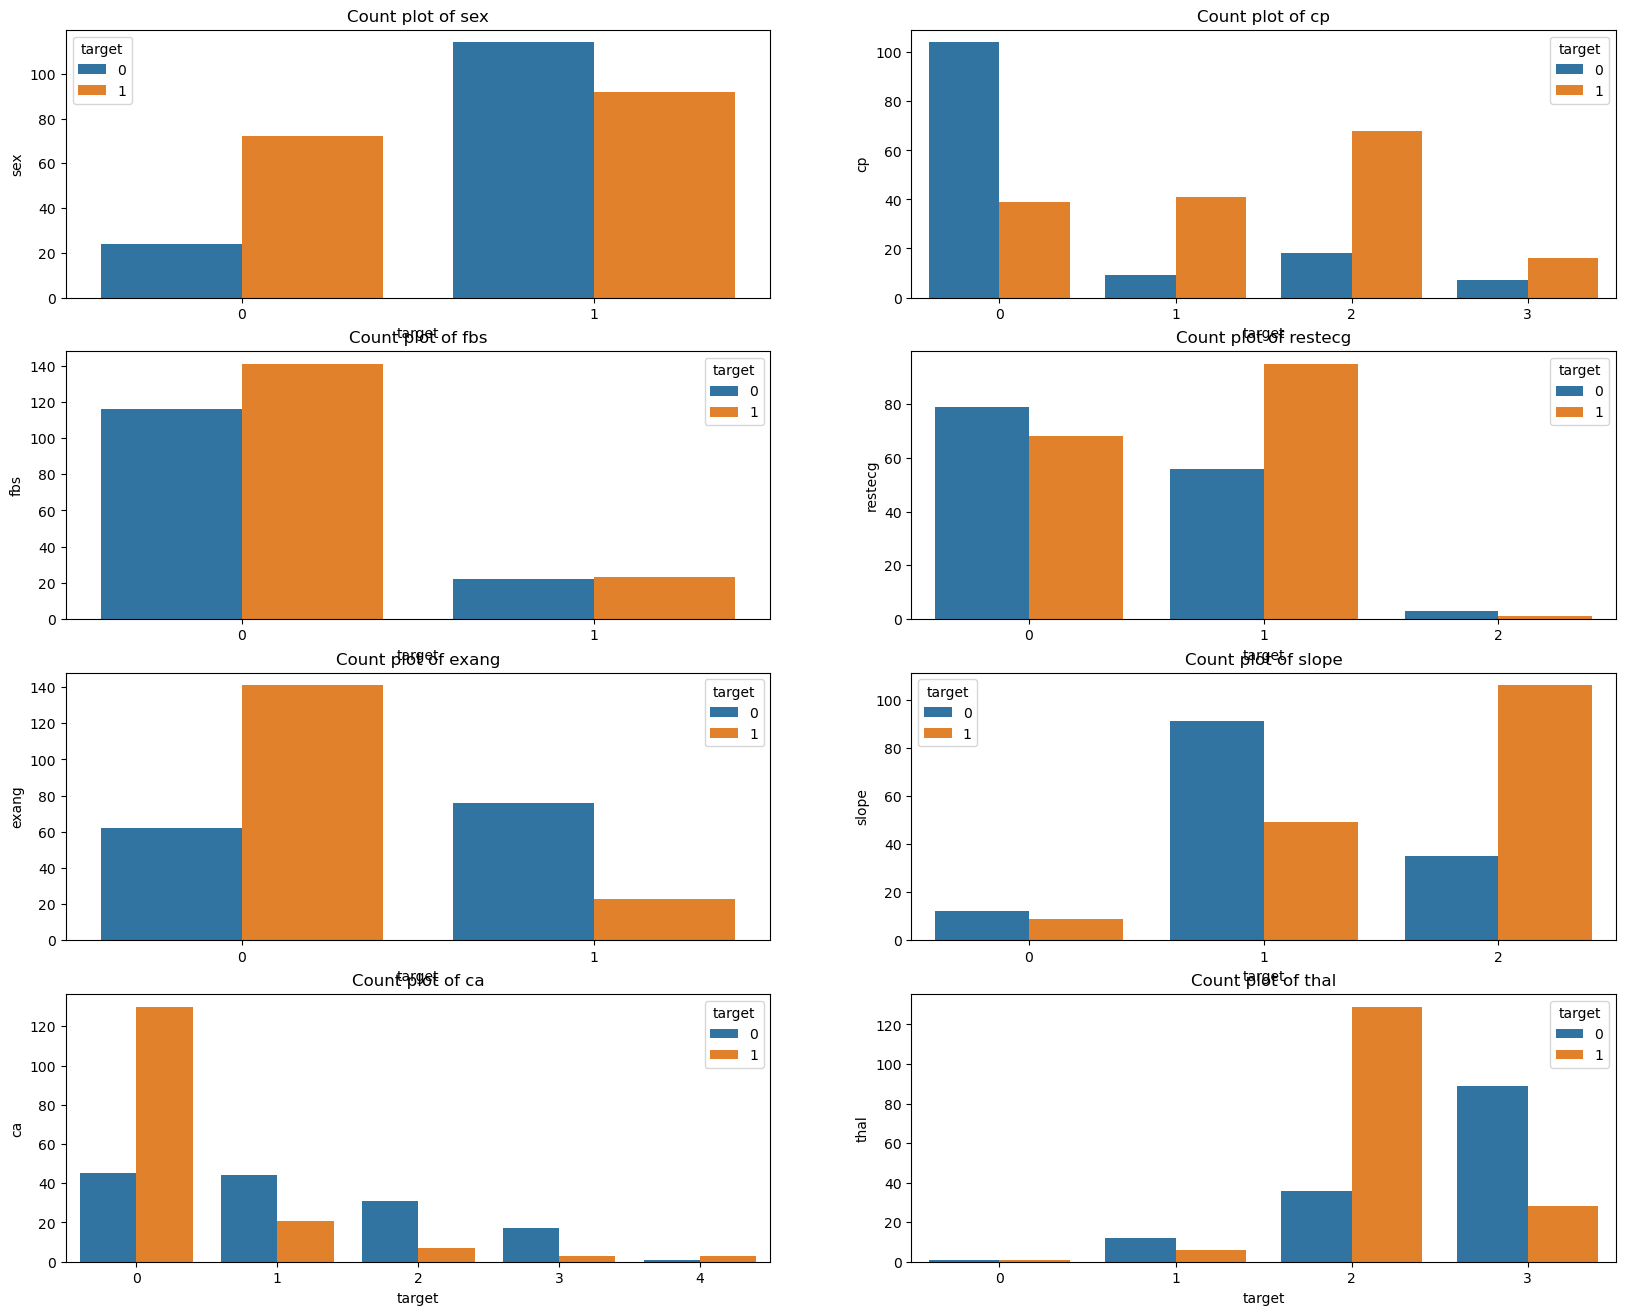

In [69]:
plt.figure(figsize=(20,16))
for i in range(len(cat_cols)):
    plt.subplot(4,2,i+1)
    sns.countplot(x=df[cat_cols[i]],hue=df['target'])
    plt.xlabel('target')
    plt.ylabel(cat_cols[i])
    plt.title(f'Count plot of {cat_cols[i]}')
    
plt.show()

In [70]:
df1 = df.copy()

In [71]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_bins
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,"(50, 55]"
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,"(50, 55]"
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,"(65, 70]"
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,"(60, 65]"
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,"(60, 65]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,"(65, 70]"
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1,"(40, 45]"
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0,"(50, 55]"
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,"(55, 60]"


In [72]:
df1[['cp','restecg','slope','thal']] = df1[['cp','restecg','slope','thal']].astype('object')

In [73]:
df1 = pd.get_dummies(df1,columns=['cp','restecg','slope','thal'],drop_first=True,dtype=int)

In [74]:
df1

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,0,...,0,0,0,1,0,0,1,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,0,115,0,1.5,0,1,...,0,1,0,0,0,1,0,0,1,0
733,44,0,108,141,0,175,0,0.6,0,1,...,0,1,0,1,0,1,0,0,1,0
739,52,1,128,255,0,161,1,0.0,1,0,...,0,0,0,1,0,0,1,0,0,1
843,59,1,160,273,0,125,0,0.0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [75]:
df1.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'target', 'Age_bins', 'cp_1', 'cp_2', 'cp_3', 'restecg_1',
       'restecg_2', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [76]:
x = df1.drop(['age','target','Age_bins'],axis=1)

In [77]:
y = df1['target']

<Axes: >

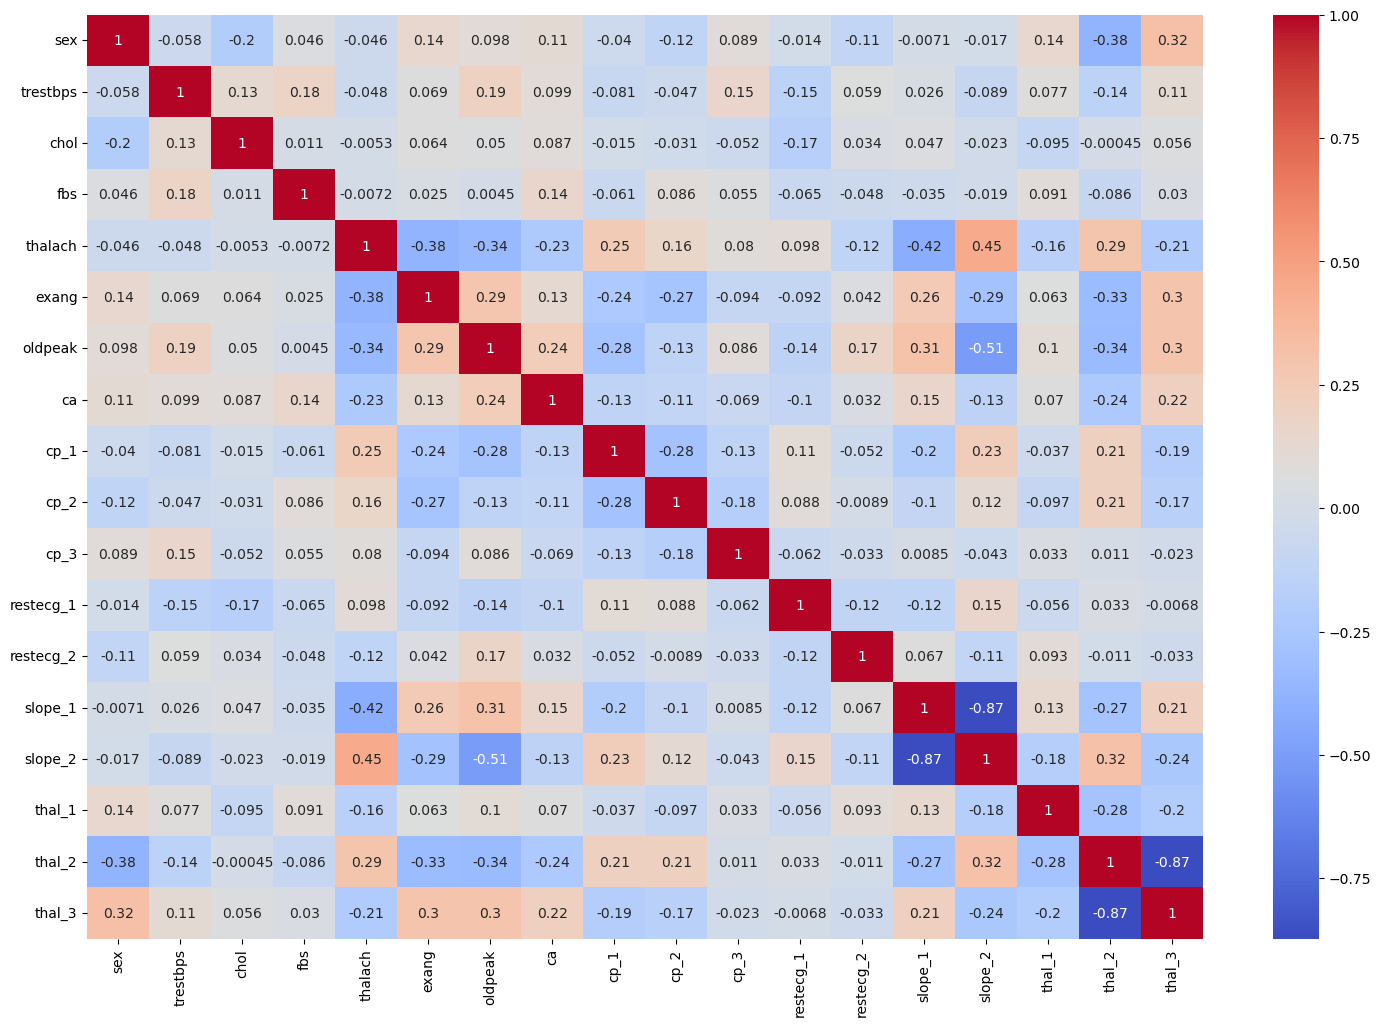

In [78]:
corr = x.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
vif = pd.DataFrame()

In [81]:
vif['features'] = x.columns

In [82]:
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [83]:
vif.sort_values('VIF',ascending=False)

,features,VIF
4,thalach,55.390014
1,trestbps,54.425834
16,thal_2,48.521927
17,thal_3,36.716445
2,chol,25.719775
14,slope_2,10.559779
13,slope_1,8.272475
15,thal_1,6.240191
0,sex,4.051084
6,oldpeak,3.234984


In [99]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *

In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 50)

In [127]:
def eval_model(model,x_train,y_train,x_test,y_test,model_name):
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    ypred_train = model.predict(x_train)
    ypred_test = model.predict(x_test)
    cm_train = confusion_matrix(y_train,ypred_train)
    cm_test = confusion_matrix(y_test,ypred_test)
    pre1 = precision_score(y_test,ypred_test)
    rec1 = recall_score(y_test,ypred_test)
    print(classification_report(y_test,ypred_test))
    auc_score = roc_auc_score(y_test,(model.predict_proba(x_test)[:,1]))
    a = pd.DataFrame({'train_score':train_score,'test_score':test_score,'pre1':pre1,'rec1':rec1,'roc_auc_score':auc_score},index=[model_name])
    return a,ypred_test

In [128]:
lr = LogisticRegression(max_iter=1000)

In [129]:
lr_df,lr_ypred = eval_model(lr,x_train,y_train,x_test,y_test,'LogReg')

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        46
           1       0.78      0.87      0.82        45

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [130]:
lr_df

,train_score,test_score,pre1,rec1,roc_auc_score
LogReg,0.867299,0.813187,0.78,0.866667,0.875362


In [138]:
sgd = SGDClassifier(max_iter=2000,loss='modified_huber')

In [139]:
sgd_df,sgd_ypred = eval_model(sgd,x_train,y_train,x_test,y_test,'SGD')

              precision    recall  f1-score   support

           0       0.89      0.17      0.29        46
           1       0.54      0.98      0.69        45

    accuracy                           0.57        91
   macro avg       0.71      0.58      0.49        91
weighted avg       0.71      0.57      0.49        91



In [158]:
sgd_df

,train_score,test_score,pre1,rec1,roc_auc_score
SGD,0.649289,0.571429,0.536585,0.977778,0.575845


In [190]:
dtc = DecisionTreeClassifier()

In [191]:
dtc_df,dtc_ypred = eval_model(dtc,x_train,y_train,x_test,y_test,'DTC')

              precision    recall  f1-score   support

           0       0.65      0.78      0.71        46
           1       0.72      0.58      0.64        45

    accuracy                           0.68        91
   macro avg       0.69      0.68      0.68        91
weighted avg       0.69      0.68      0.68        91



In [192]:
dtc_df

,train_score,test_score,pre1,rec1,roc_auc_score
DTC,1.0,0.681319,0.722222,0.577778,0.680193


In [193]:
params = {'criterion':['gini','entropy','log_loss'],
          'max_depth':[1,2,5,8,10,12],
          'min_samples_leaf':[2,5,8,10],
          'min_samples_split':[2,5,10,15,20]}


In [194]:
gd_search = GridSearchCV(estimator=dtc,n_jobs=-1,param_grid=params,cv=15)

In [195]:
gd_search.fit(x_train,y_train)

GridSearchCV(cv=15, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 5, 8, 10, 12],
                         'min_samples_leaf': [2, 5, 8, 10],
                         'min_samples_split': [2, 5, 10, 15, 20]})

In [196]:
gd_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 15}

In [197]:
dtc2 = DecisionTreeClassifier(**gd_search.best_params_)

In [198]:
dtc_df2,dtc_ypred = eval_model(dtc2,x_train,y_train,x_test,y_test,'DTC with Params')

              precision    recall  f1-score   support

           0       0.65      0.72      0.68        46
           1       0.68      0.60      0.64        45

    accuracy                           0.66        91
   macro avg       0.66      0.66      0.66        91
weighted avg       0.66      0.66      0.66        91



In [199]:
dtc_df2

,train_score,test_score,pre1,rec1,roc_auc_score
DTC with Params,0.876777,0.659341,0.675,0.6,0.752415


In [220]:
bgr = BaggingClassifier(dtc2,n_estimators=50)

In [221]:
bgr_df,bgr_ypred = eval_model(bgr,x_train,y_train,x_test,y_test,'BaggingC')

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        46
           1       0.78      0.80      0.79        45

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



In [222]:
bgr_df

,train_score,test_score,pre1,rec1,roc_auc_score
BaggingC,0.890995,0.791209,0.782609,0.8,0.860386


In [223]:
rf = RandomForestClassifier()

In [224]:
rf_df,bgr_ypred = eval_model(rf,x_train,y_train,x_test,y_test,'RandomF')

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        46
           1       0.79      0.84      0.82        45

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [225]:
rf_df

,train_score,test_score,pre1,rec1,roc_auc_score
RandomF,1.0,0.813187,0.791667,0.844444,0.899275


In [227]:
params_r = {'criterion':['gini','entropy','log_loss'],
          'max_depth':[1,2,5,8,10,12],
          'min_samples_leaf':[2,5,8,10],
          'min_samples_split':[2,5,10,15,20],
           'n_estimators':[45,50,55,65,75],
           'max_samples':[0.7,0.75],
           'max_features':['log2','sqrt'],
            'bootstrap':[True]}

In [234]:
rf_search = RandomizedSearchCV(estimator=rf,n_jobs=-1,cv=10,param_distributions=params_r)

In [235]:
rf_search.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 2, 5, 8, 10, 12],
                                        'max_features': ['log2', 'sqrt'],
                                        'max_samples': [0.7, 0.75],
                                        'min_samples_leaf': [2, 5, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [45, 50, 55, 65, 75]})

In [236]:
rf_search.best_params_

{'n_estimators': 75,
 'min_samples_split': 15,
 'min_samples_leaf': 8,
 'max_samples': 0.75,
 'max_features': 'log2',
 'max_depth': 12,
 'criterion': 'entropy',
 'bootstrap': True}

In [237]:
rf2 = RandomForestClassifier(**rf_search.best_params_)

In [238]:
rf2_df,bgr_ypred = eval_model(rf2,x_train,y_train,x_test,y_test,'RandomF2')

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        46
           1       0.79      0.82      0.80        45

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [239]:
rf2_df

,train_score,test_score,pre1,rec1,roc_auc_score
RandomF2,0.867299,0.802198,0.787234,0.822222,0.878261


In [246]:
fpr,tpr,thresh = roc_curve(y_test,(bgr.predict_proba(x_test)[:,1]))

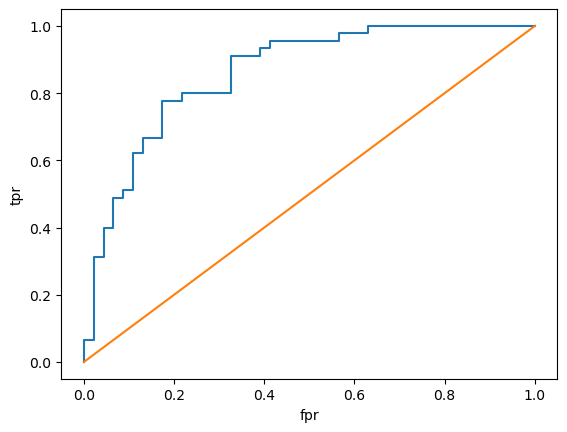

In [247]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1])
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [248]:
thresh = thresh[np.argmax(abs(fpr-tpr))]

In [249]:
thresh

0.5395913769267182

In [256]:
svc =SVC(probability=True,kernel='poly')

In [257]:
svc_df,bgr_ypred = eval_model(svc,x_train,y_train,x_test,y_test,'SVC')

              precision    recall  f1-score   support

           0       0.70      0.41      0.52        46
           1       0.58      0.82      0.68        45

    accuracy                           0.62        91
   macro avg       0.64      0.62      0.60        91
weighted avg       0.64      0.62      0.60        91



In [258]:
df= pd.concat([lr_df,sgd_df,dtc_df,dtc_df2,bgr_df,rf_df,rf2_df,svc_df])

In [259]:
df

,train_score,test_score,pre1,rec1,roc_auc_score
LogReg,0.867299,0.813187,0.780000,0.866667,0.875362
SGD,0.649289,0.571429,0.536585,0.977778,0.575845
DTC,1.000000,0.681319,0.722222,0.577778,0.680193
DTC with Params,0.876777,0.659341,0.675000,0.600000,0.752415
BaggingC,0.890995,0.791209,0.782609,0.800000,0.860386
RandomF,1.000000,0.813187,0.791667,0.844444,0.899275
RandomF2,0.867299,0.802198,0.787234,0.822222,0.878261
SVC,0.687204,0.615385,0.578125,0.822222,0.742512


In [262]:
df1 = pd.DataFrame({'features':x_train.columns,'Importance':rf2.feature_importances_})

In [264]:
df1.sort_values('Importance',ascending=False)

,features,Importance
7,ca,0.157799
6,oldpeak,0.147732
5,exang,0.128399
16,thal_2,0.125417
4,thalach,0.106105
17,thal_3,0.074149
2,chol,0.063251
9,cp_2,0.046685
14,slope_2,0.032004
1,trestbps,0.031535


In [265]:
df2 = pd.DataFrame({'features':x_train.columns,'Importance':dtc2.feature_importances_})
df2.sort_values('Importance',ascending=False)

,features,Importance
7,ca,0.409853
6,oldpeak,0.151348
5,exang,0.149500
9,cp_2,0.092476
1,trestbps,0.048053
17,thal_3,0.045741
8,cp_1,0.032536
2,chol,0.031518
4,thalach,0.020007
13,slope_1,0.018968
